Overview:
This notebook provide solution to HackerEarth Machine Learning Competition-Adopt a buddy August2020. In this competition the target was to predict the breed category and pet category based on given certain independent attributes. For this notebook, we’ll be using the “Pet Adoption” dataset hosted on HackerEarth. Please check the link below:[https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-pet-adoption/](http://) 
A leading pet adoption agency is planning to create a virtual tour experience for their customers showcasing all animals that are available in their shelter. The goal of this analysis is to help us understand the relationship between pet features and how these variables are used to predict type and breed of the animal. 

Results:
Achived 238 rank out of 5060 participants.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackerearth-ml-challenge-pet-adoption/test.csv
/kaggle/input/hackerearth-ml-challenge-pet-adoption/train.csv


In [2]:
#reading data
train= pd.read_csv('../input/hackerearth-ml-challenge-pet-adoption/train.csv')
test= pd.read_csv('../input/hackerearth-ml-challenge-pet-adoption/test.csv')

print("Train Shape: ",train.shape)
print("Test Shape: ", test.shape)

Train Shape:  (18834, 11)
Test Shape:  (8072, 9)


In [3]:
# Check for columns
print(train.columns)
print(test.columns)

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')
Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2'],
      dtype='object')


In [4]:
# Checking the data
train.head(2)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2


In [5]:
# Checking the data
test.head(2)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1


Nullvalue imputation

In [6]:
train.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [7]:
test.isnull().sum()


pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [8]:
test.isnull().mean()

pet_id          0.000000
issue_date      0.000000
listing_date    0.000000
condition       0.076685
color_type      0.000000
length(m)       0.000000
height(cm)      0.000000
X1              0.000000
X2              0.000000
dtype: float64

In [9]:
train.isnull().mean()

pet_id            0.000000
issue_date        0.000000
listing_date      0.000000
condition         0.078422
color_type        0.000000
length(m)         0.000000
height(cm)        0.000000
X1                0.000000
X2                0.000000
breed_category    0.000000
pet_category      0.000000
dtype: float64

Both of the train and test data have same percentage of null values.

In [10]:
print(train['condition'].unique())
print(test['condition'].unique())

[ 2.  1. nan  0.]
[ 0.  1.  2. nan]


In [11]:
train.fillna(-99,inplace = True)

In [12]:
test.fillna(-99,inplace = True)

In [13]:
train.groupby('condition')['breed_category'].value_counts()

condition  breed_category
-99.0      2.0               1477
 0.0       1.0               6281
 1.0       0.0               6819
 2.0       0.0               2181
           1.0               2076
Name: breed_category, dtype: int64

All the values having null values for condition belonged to breed category 2

In [14]:
train.groupby('condition')['pet_category'].value_counts()

condition  pet_category
-99.0      4                783
           1                583
           2                 60
           0                 51
 0.0       2               3875
           1               2376
           4                 30
 1.0       2               4576
           1               2218
           4                 25
 2.0       2               2110
           1               2007
           4                103
           0                 37
Name: pet_category, dtype: int64

From above result we can not say that all the missing value and pet_category have some connection.

Feature Engineering

In [15]:
#length feature
print(len(train[train['length(m)'] == 0]))
print(len(test[test['length(m)']==0]))

93
44


In [16]:
#convert length(m) to length(cm)
train['length(cm)'] = train['length(m)'].apply(lambda x: x*100)
test['length(cm)'] = test['length(m)'].apply(lambda x: x*100)

In [17]:
train.drop('length(m)', axis=1, inplace=True)
test.drop('length(m)', axis=1, inplace=True)

In [18]:
# replace all 0 length with mean of lengths
val = train['length(cm)'].mean()
train['length(cm)'] = train['length(cm)'].replace(to_replace=0, value=val)
test['length(cm)'] = test['length(cm)'].replace(to_replace=0, value=val)

In [19]:
# check again for 0 length
print(len(train[train['length(cm)'] == 0]))
print(len(test[test['length(cm)']==0]))


0
0


In [20]:
#new feature
train['ratio_len_height'] = train['length(cm)']/train['height(cm)']

In [21]:
test['ratio_len_height'] = test['length(cm)']/test['height(cm)']

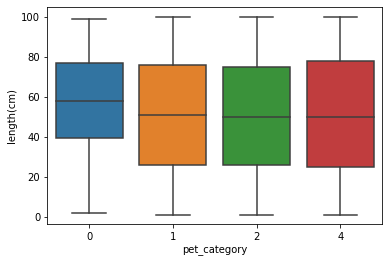

In [22]:
#relation between length and target variables
import seaborn as sns
sns.boxplot(x='pet_category',y='length(cm)',data=train)

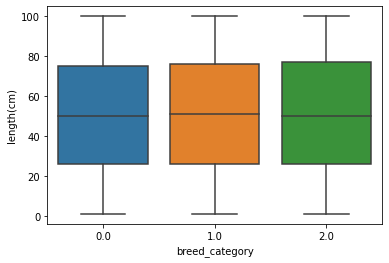

In [23]:
sns.boxplot(x='breed_category',y='length(cm)',data=train)

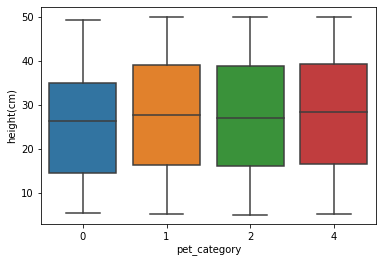

In [24]:
sns.boxplot(x='pet_category',y='height(cm)',data=train)

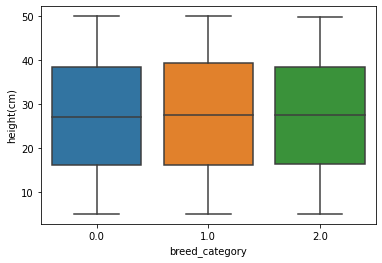

In [25]:
sns.boxplot(x='breed_category',y='height(cm)',data=train)

In [26]:
train.head(1)

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,length(cm),ratio_len_height
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,7.78,13,9,0.0,1,80.0,10.282776


In [27]:
#date
train['issue_year'] = train['issue_date'].map(lambda x:x[:4])
train['listing_year'] = train['listing_date'].map(lambda x:x[:4])

In [28]:
test['issue_year'] = test['issue_date'].map(lambda x:x[:4])
test['listing_year'] = test['listing_date'].map(lambda x:x[:4])

In [29]:
#No help
#train['issue_month'] = train['issue_date'].map(lambda x:x[5:7])
#train['listing_month'] = train['listing_date'].map(lambda x:x[5:7])

In [30]:
#test['issue_month'] = test['issue_date'].map(lambda x:x[5:7])
#test['listing_month'] = test['listing_date'].map(lambda x:x[5:7])


In [31]:
#train['Day_issue']=train['issue_date'].map(lambda x:x[8:10])
#train['Day_listing']=train['listing_date'].map(lambda x:x[8:10])

In [32]:
#test['Day_issue']=test['issue_date'].map(lambda x:x[8:10])
#test['Day_listing']=test['listing_date'].map(lambda x:x[8:10])

In [33]:
train.head(2)

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,length(cm),ratio_len_height,issue_year,listing_year
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,7.78,13,9,0.0,1,80.0,10.282776,2016,2016
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,14.19,13,9,0.0,2,72.0,5.073996,2013,2018


In [34]:
test.head(2)

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,length(cm),ratio_len_height,issue_year,listing_year
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,42.73,0,7,87.0,2.036040,2005,2017
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,6.71,0,1,6.0,0.894188,2018,2019


In [35]:
# lets see how the target depends on year
train.groupby('issue_year')['breed_category'].value_counts()

issue_year  breed_category
1994        2.0                  1
1995        1.0                  1
1997        1.0                  1
1998        0.0                  4
            1.0                  1
                              ... 
2018        1.0               1192
            2.0                250
2019        1.0                 90
            0.0                 65
            2.0                  9
Name: breed_category, Length: 61, dtype: int64

In [36]:
# lets see how the target depends on year
train.groupby('listing_year')['breed_category'].value_counts()

listing_year  breed_category
2015          0.0                  9
              2.0                  2
              1.0                  1
2016          0.0               1590
              1.0               1518
              2.0                364
2017          0.0               3075
              1.0               2857
              2.0                490
2018          0.0               3049
              1.0               2796
              2.0                478
2019          0.0               1277
              1.0               1185
              2.0                143
Name: breed_category, dtype: int64

In [37]:
# lets change the datatypes of the newly created cols to int

train['issue_year'] = train['issue_year'].astype('int')
test['issue_year'] = test['issue_year'].astype('int')
train['listing_year'] = train['listing_year'].astype('int')
test['listing_year'] = test['listing_year'].astype('int')
#train['issue_month']=train['issue_month'].astype('int')
#train['listing_month']=train['listing_month'].astype('int')
#test['issue_month']=test['issue_month'].astype('int')
#test['listing_month']=test['listing_month'].astype('int')

#train['Day_issue']=train['Day_issue'].astype('int')
#test['Day_issue']=test['Day_issue'].astype('int')
#train['Day_listing']=train['Day_listing'].astype('int')
#test['Day_listing']=test['Day_listing'].astype('int')

In [38]:
train.dtypes

pet_id               object
issue_date           object
listing_date         object
condition           float64
color_type           object
height(cm)          float64
X1                    int64
X2                    int64
breed_category      float64
pet_category          int64
length(cm)          float64
ratio_len_height    float64
issue_year            int64
listing_year          int64
dtype: object

In [39]:
#now lets see whether the target variables are realated to the amount of years it has between issue and listing
train['difference_years'] = train['listing_year'] - train['issue_year']
train.groupby('difference_years')['breed_category'].value_counts()

difference_years  breed_category
0                 1.0               2158
                  0.0               2156
                  2.0                613
1                 1.0               2596
                  0.0               2550
                  2.0                521
2                 0.0               1431
                  1.0               1277
                  2.0                252
3                 0.0                779
                  1.0                577
                  2.0                 56
4                 0.0                432
                  1.0                344
                  2.0                 13
5                 0.0                358
                  1.0                284
                  2.0                 10
6                 0.0                270
                  1.0                194
                  2.0                  2
7                 0.0                228
                  1.0                183
8                 0.0   

In [40]:
test['difference_years'] = test['listing_year'] - test['issue_year']


In [41]:
train.groupby('difference_years')['pet_category'].value_counts()

difference_years  pet_category
0                 1               3074
                  2               1674
                  4                166
                  0                 13
1                 2               2912
                  1               2237
                  4                459
                  0                 59
2                 2               2033
                  1                685
                  4                229
                  0                 13
3                 2               1053
                  1                300
                  4                 57
                  0                  2
4                 2                627
                  1                146
                  4                 16
5                 2                516
                  1                129
                  4                  7
6                 2                365
                  1                 97
                  4              

In [42]:
# drop the isuue data and listing data col now
train.drop(['issue_date','listing_date'],axis = 1,inplace = True)
# drop the isuue data and listing data col now
test.drop(['issue_date','listing_date'],axis = 1,inplace = True)

In [43]:
#newly added
#train['1stnum'] = train['pet_id'].str[:6]
#train['1st2num'] = train['pet_id'].str[:7]


In [44]:
#newly added
#test['1stnum'] = test['pet_id'].str[:6]
#test['1st2num'] = test['pet_id'].str[:7]

In [45]:
train.dtypes

pet_id               object
condition           float64
color_type           object
height(cm)          float64
X1                    int64
X2                    int64
breed_category      float64
pet_category          int64
length(cm)          float64
ratio_len_height    float64
issue_year            int64
listing_year          int64
difference_years      int64
dtype: object

In [46]:
train.head(2)

,pet_id,condition,color_type,height(cm),X1,X2,breed_category,pet_category,length(cm),ratio_len_height,issue_year,listing_year,difference_years
0,ANSL_69903,2.0,Brown Tabby,7.78,13,9,0.0,1,80.0,10.282776,2016,2016,0
1,ANSL_66892,1.0,White,14.19,13,9,0.0,2,72.0,5.073996,2013,2018,5


In [47]:
test.head(2)

,pet_id,condition,color_type,height(cm),X1,X2,length(cm),ratio_len_height,issue_year,listing_year,difference_years
0,ANSL_75005,0.0,Black,42.73,0,7,87.0,2.036040,2005,2017,12
1,ANSL_76663,1.0,Orange Tabby,6.71,0,1,6.0,0.894188,2018,2019,1


In [48]:
train.shape

(18834, 13)

In [49]:
test.shape

(8072, 11)

In [50]:
train.head(2)

,pet_id,condition,color_type,height(cm),X1,X2,breed_category,pet_category,length(cm),ratio_len_height,issue_year,listing_year,difference_years
0,ANSL_69903,2.0,Brown Tabby,7.78,13,9,0.0,1,80.0,10.282776,2016,2016,0
1,ANSL_66892,1.0,White,14.19,13,9,0.0,2,72.0,5.073996,2013,2018,5


In [51]:
test.head(2)

,pet_id,condition,color_type,height(cm),X1,X2,length(cm),ratio_len_height,issue_year,listing_year,difference_years
0,ANSL_75005,0.0,Black,42.73,0,7,87.0,2.036040,2005,2017,12
1,ANSL_76663,1.0,Orange Tabby,6.71,0,1,6.0,0.894188,2018,2019,1


In [52]:
train.to_csv('train_processed.csv')
test.to_csv('test_processed.csv')

model1

In [53]:
train_df=pd.read_csv('./train_processed.csv')
test_df=pd.read_csv('./test_processed.csv')

In [54]:
train_df.drop(['pet_category'],1,inplace=True)

In [55]:
train_df.drop(['pet_id'],1,inplace=True)


In [56]:
test=test_df.drop(['pet_id'],1)

In [57]:
train_df['color_type'].nunique()

56

In [58]:
test['color_type'].nunique()


54

In [59]:
color_data=train_df['color_type'].value_counts().to_dict()

In [60]:

train_df['color_type']=train_df['color_type'].map(color_data)
test['color_type']=test['color_type'].map(color_data)


In [61]:
#train_df.select_dtypes(exclude='number').columns.to_list()

In [62]:
train_df.shape,test.shape

((18834, 12), (8072, 11))

In [63]:
train_df.head(2)

,Unnamed: 0,condition,color_type,height(cm),X1,X2,breed_category,length(cm),ratio_len_height,issue_year,listing_year,difference_years
0,0,2.0,1687,7.78,13,9,0.0,80.0,10.282776,2016,2016,0
1,1,1.0,2453,14.19,13,9,0.0,72.0,5.073996,2013,2018,5


In [64]:
test.head()

,Unnamed: 0,condition,color_type,height(cm),X1,X2,length(cm),ratio_len_height,issue_year,listing_year,difference_years
0,0,0.0,4620,42.73,0,7,87.0,2.036040,2005,2017,12
1,1,1.0,791,6.71,0,1,6.0,0.894188,2018,2019,1
2,2,1.0,4620,41.21,0,7,24.0,0.582383,2012,2018,6
3,3,1.0,4620,8.46,7,1,29.0,3.427896,2015,2018,3
4,4,1.0,1791,30.92,0,7,71.0,2.296248,2017,2018,1


In [65]:
test.drop(['Unnamed: 0'],1,inplace=True)

In [66]:
#train_df=pd.get_dummies(train_df)

In [67]:
#test=pd.get_dummies(test)

In [68]:
train_df.shape,test.shape

((18834, 12), (8072, 10))

In [69]:
y = train_df["breed_category"].values

In [70]:
a=set(train_df.columns)-set(test.columns)
a

{'Unnamed: 0', 'breed_category'}

In [71]:
train=train_df.drop(a,axis=1)

In [72]:
train.shape,test.shape

((18834, 10), (8072, 10))

In [73]:
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder 


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score, f1_score

In [74]:

X=train.values

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=44,shuffle=True)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.33389539,  0.26406918, -0.17224895, ...,  0.94111377,
         1.67679294, -0.44399831],
       [ 0.29677619, -1.13013833, -0.84645638, ..., -0.6663502 ,
         0.61576068,  0.87449837],
       [ 0.33389539,  1.58569984, -1.70055495, ...,  0.94111377,
         0.61576068, -0.77362248],
       ...,
       [ 0.259657  , -0.92948467,  0.88249744, ...,  0.29812818,
         1.67679294,  0.21525003],
       [ 0.33389539, -1.13501745, -0.44516074, ..., -0.02336461,
         0.61576068,  0.21525003],
       [ 0.259657  ,  0.26406918, -1.53757664, ..., -1.63082858,
        -1.50630385,  1.20412254]])

In [77]:
from xgboost import XGBClassifier

model1 = XGBClassifier()
model1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
preds = model1.predict(X_test)

In [79]:
preds[:5]

array([1., 0., 0., 0., 1.])

In [80]:
from sklearn.metrics import precision_score

print(precision_score(y_test, preds, average='macro'))

0.9276313611449897


In [81]:
f1_score(y_test, preds, average='weighted')

0.8996307926599336

Gridsearch

In [82]:
# Define scorer
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
#def f1_metric(y_test, y_pred):
    #score = f1_score(y_test, preds, average='weighted')
    #return score
#f1_scorer = make_scorer(f1_metric,greater_is_better=True)
scorer = make_scorer(f1_score, average = 'weighted')

In [83]:
from sklearn.model_selection import GridSearchCV
#scorer = make_scorer(f1_score, average = 'weighted')
parameters = {"n_estimators": [50,100,150,200],
              "objective": ['multi:softprob'],
              "max_depth": range(3,10),
              "learning_rate": [0.01,0.1,0.2,0.3]}

grid_search = GridSearchCV(estimator = model1,
                           param_grid = parameters,
                           scoring = scorer,
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [84]:
best_accuracy = grid_search.best_score_
best_accuracy

0.9032866681792416

In [85]:
best_parameters = grid_search.best_params_
best_parameters

{'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 50,
 'objective': 'multi:softprob'}

In [86]:
tunedmodel=XGBClassifier(n_estimators = best_parameters["n_estimators"],
                         max_depth = best_parameters["max_depth"],
                         learning_rate= best_parameters["learning_rate"],
                         objective= best_parameters["objective"])
tunedmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
preds = tunedmodel.predict(X_test)

testing on test set

In [88]:
sc.transform(test)

array([[ 0.259657  ,  1.58569984,  1.17001577, ..., -3.23829255,
        -0.44527159,  3.18186757],
       [ 0.29677619, -0.74956725, -1.59907789, ...,  0.94111377,
         1.67679294, -0.44399831],
       [ 0.29677619,  1.58569984,  1.0531634 , ..., -0.98784299,
         0.61576068,  1.20412254],
       ...,
       [ 0.259657  ,  1.58569984,  0.74411963, ..., -0.02336461,
        -0.44527159, -0.11437414],
       [-3.41514345,  1.58569984, -0.2829512 , ...,  0.29812818,
        -0.44527159, -0.44399831],
       [ 0.259657  ,  1.58569984, -0.23067514, ...,  0.29812818,
        -0.44527159, -0.44399831]])

In [89]:
test= np.array(test)

In [90]:
pred = tunedmodel.predict(test)

In [91]:
pred 

array([1., 0., 0., ..., 1., 2., 1.])

In [92]:
sub_df = pd.concat([test_df['pet_id'],
                    pd.DataFrame(pred,columns=["breed_category"])],
                   axis=1)
sub_df.head()

,pet_id,breed_category
0,ANSL_75005,1.0
1,ANSL_76663,0.0
2,ANSL_58259,0.0
3,ANSL_67171,0.0
4,ANSL_72871,0.0


In [93]:
sub_df.to_csv("model1.csv", index=False)

model2

In [94]:
train_df=pd.read_csv('./train_processed.csv')
test_df=pd.read_csv('./test_processed.csv')

In [95]:
train_df.drop(['breed_category'],1,inplace=True)

In [96]:
train_df.drop(['pet_id'],1,inplace=True)
train_df.drop(['Unnamed: 0'],1,inplace=True)

In [97]:
test=test_df.drop(['pet_id'],1)
test.drop(['Unnamed: 0'],1,inplace=True)

In [98]:
color_data=train_df['color_type'].value_counts().to_dict()

In [99]:
train_df['color_type']=train_df['color_type'].map(color_data)
test['color_type']=test['color_type'].map(color_data)


In [100]:
train_df.shape,test.shape

((18834, 11), (8072, 10))

In [101]:
y = train_df["pet_category"].values

In [102]:
a=set(train_df.columns)-set(test.columns)
a

{'pet_category'}

In [103]:
train=train_df.drop(a,axis=1)

In [104]:
train.shape,test.shape

((18834, 10), (8072, 10))

In [105]:
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder 


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score, f1_score

In [106]:
X=train.values

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=44,shuffle=True)

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.33389539,  0.26406918, -0.17224895, ...,  0.94111377,
         1.67679294, -0.44399831],
       [ 0.29677619, -1.13013833, -0.84645638, ..., -0.6663502 ,
         0.61576068,  0.87449837],
       [ 0.33389539,  1.58569984, -1.70055495, ...,  0.94111377,
         0.61576068, -0.77362248],
       ...,
       [ 0.259657  , -0.92948467,  0.88249744, ...,  0.29812818,
         1.67679294,  0.21525003],
       [ 0.33389539, -1.13501745, -0.44516074, ..., -0.02336461,
         0.61576068,  0.21525003],
       [ 0.259657  ,  0.26406918, -1.53757664, ..., -1.63082858,
        -1.50630385,  1.20412254]])

In [109]:
model2 = XGBClassifier()
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
#resut
preds = model2.predict(X_test)

In [111]:
preds

array([2, 2, 1, ..., 2, 2, 2])

In [112]:
from sklearn.metrics import precision_score

print(precision_score(y_test, preds, average='macro'))

0.795162425647894


In [113]:
f1_score(y_test, preds, average='weighted')

0.8755087579584916

In [114]:
print(confusion_matrix(preds, y_test))

[[   5    0    2    3]
 [   3 1156  146   14]
 [   5  258 2000   21]
 [   6    3    2  143]]


gridesearch

In [115]:
scorer = make_scorer(f1_score, average = 'weighted')

In [116]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators": [50,100,150,200],
              "objective": ['multi:softprob'],
              "max_depth": range(3,10),
              "learning_rate": [0.01,0.1,0.2,0.3]}

grid_search = GridSearchCV(estimator = model1,
                           param_grid = parameters,
                           scoring = scorer,
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [117]:
best_accuracy = grid_search.best_score_
best_accuracy

0.8835725246326854

In [118]:
best_parameters = grid_search.best_params_
best_parameters

{'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 150,
 'objective': 'multi:softprob'}

In [119]:
tunedmodel=XGBClassifier(n_estimators = best_parameters["n_estimators"],
                         max_depth = best_parameters["max_depth"],
                         learning_rate= best_parameters["learning_rate"],
                         objective= best_parameters["objective"])
tunedmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
sc.transform(test)

array([[ 0.259657  ,  1.58569984,  1.17001577, ..., -3.23829255,
        -0.44527159,  3.18186757],
       [ 0.29677619, -0.74956725, -1.59907789, ...,  0.94111377,
         1.67679294, -0.44399831],
       [ 0.29677619,  1.58569984,  1.0531634 , ..., -0.98784299,
         0.61576068,  1.20412254],
       ...,
       [ 0.259657  ,  1.58569984,  0.74411963, ..., -0.02336461,
        -0.44527159, -0.11437414],
       [-3.41514345,  1.58569984, -0.2829512 , ...,  0.29812818,
        -0.44527159, -0.44399831],
       [ 0.259657  ,  1.58569984, -0.23067514, ...,  0.29812818,
        -0.44527159, -0.44399831]])

In [121]:
test= np.array(test)

In [122]:

pred = tunedmodel.predict(test)


In [123]:
sample = pd.read_csv('./model1.csv')
sample.head()

,pet_id,breed_category
0,ANSL_75005,1.0
1,ANSL_76663,0.0
2,ANSL_58259,0.0
3,ANSL_67171,0.0
4,ANSL_72871,0.0


In [124]:
sample['pet_category'] = pred

In [125]:
sample.to_csv('submission.csv', header=True, index=False) 
sample.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2


In [126]:
sub=pd.read_csv('./submission.csv')

In [127]:
sub['pet_category'].unique()

array([2, 1, 4, 0])

In [129]:
sub['pet_category'].unique()

array([2, 1, 4, 0])